In [ ]:
# 1. AdaBoost with Decision Tree Base Model on Heart Disease Dataset
# o Dataset: Use the Heart Disease Dataset from the UCI repository or Kaggle.
# o Tasks:
# 1. Load and preprocess the data (handle any missing values and encode 
# categorical variables).
# 2. Split the data into training and testing sets (80% train, 20% test).
# 3. Initialize an AdaBoost classifier with a Decision Tree as the base 
# estimator and set n_estimators=50.
# 4. Train the model with Decision Trees of varying depths (max_depth=1, 
# max_depth=3, and max_depth=5).
# 5. Evaluate each model using a confusion matrix and accuracy score, and 
# report the results.
# 6. Analyze how the depth of the base estimator affects the model’s 
# performance, discussing trade-offs between underfitting and 
# overfitting.


In [119]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [6]:
hf_df=pd.read_csv('../hf.csv')
hf_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
X = hf_df.drop('DEATH_EVENT', axis=1) 
y = hf_df['DEATH_EVENT']   

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
ada_classifier_depth_1 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=50,                                     
    random_state=42                                     
)
ada_classifier_depth_3 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  
    n_estimators=50,                                     
    random_state=42                                    
)
ada_classifier_depth_5 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),  
    n_estimators=50,                                     
    random_state=42                                    
)

In [13]:
ada_classifier_depth_1.fit(X_train,y_train)
ada_classifier_depth_3.fit(X_train,y_train)
ada_classifier_depth_5.fit(X_train,y_train)


/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   random_state=42)

In [14]:
y_pred_depth_1 = ada_classifier_depth_1.predict(X_test)
y_pred_depth_3 = ada_classifier_depth_3.predict(X_test)
y_pred_depth_5 = ada_classifier_depth_5.predict(X_test)


<Axes: >

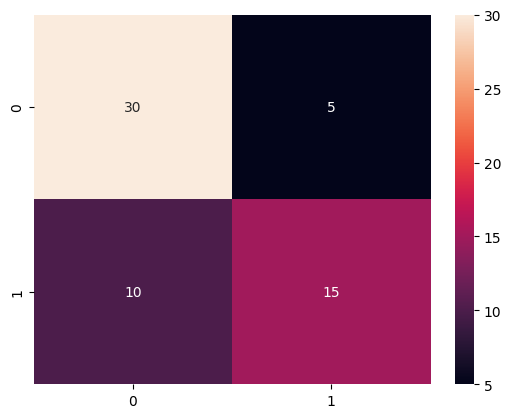

In [17]:
conf_matrix_depth_1 = confusion_matrix(y_test, y_pred_depth_1)
sns.heatmap(conf_matrix_depth_1,annot=True)

<Axes: >

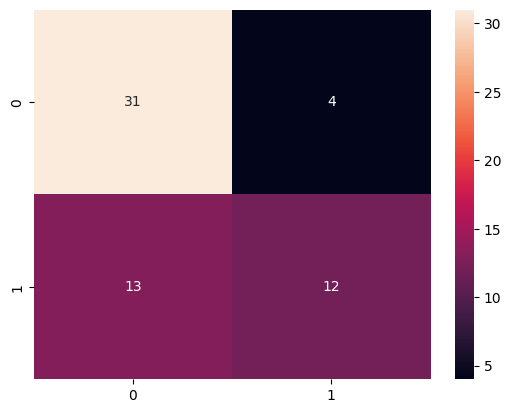

In [19]:
conf_matrix_depth_3 = confusion_matrix(y_test, y_pred_depth_3)
sns.heatmap(conf_matrix_depth_3,annot=True)

<Axes: >

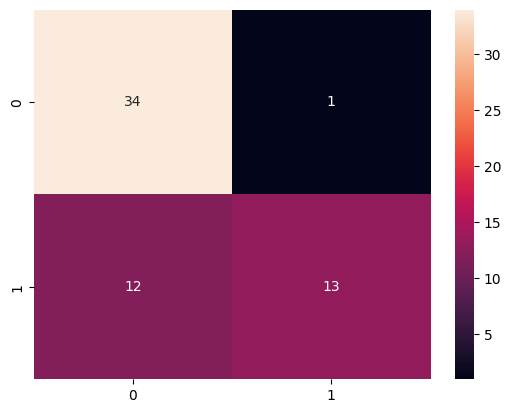

In [20]:
conf_matrix_depth_5 = confusion_matrix(y_test, y_pred_depth_5)
sns.heatmap(conf_matrix_depth_5,annot=True)

In [21]:
class_report_depth_1 = classification_report(y_test, y_pred_depth_1)
print(class_report_depth_1)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



In [22]:
class_report_depth_3 = classification_report(y_test, y_pred_depth_3)
print(class_report_depth_3)

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60



In [23]:
class_report_depth_5 = classification_report(y_test, y_pred_depth_5)
print(class_report_depth_5)

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60



In [ ]:
# 2. Feature Impact Analysis with AdaBoost on the Iris Dataset
# o Dataset: Use the Iris Dataset from sklearn.datasets.
# o Tasks:
# 1. Load the Iris dataset and split it into training and testing sets (70% 
# train, 30% test).
# 2. Initialize an AdaBoost classifier with a Decision Tree as the base 
# estimator (max_depth=2) and n_estimators=100.
# 3. Train the model and calculate feature importance scores.
# 4. Display the importance scores and identify the top two features.
# 5. Visualize these two features in a 2D scatter plot, coloring points by 
# their class.
# 6. Discuss how well these top features separate the classes.

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target
iris_df= pd.DataFrame(iris.data, columns=['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width'])
iris_df['species']=iris.target
iris_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
X = iris_df.drop('species', axis=1) 
y = iris_df['species']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ada_classifier= AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),  
    n_estimators=100,                                     
    random_state=42                                    
)

In [42]:
ada_classifier.fit(X_train,y_train)

/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)

In [43]:

feature_importances = ada_classifier.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature':['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width'],
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

        Feature  Importance
2  Petal_length    0.328450
3   Petal_width    0.276763
1   Sepal_width    0.245827
0  Sepal_length    0.148961


<Axes: xlabel='Petal_length', ylabel='Petal_width'>

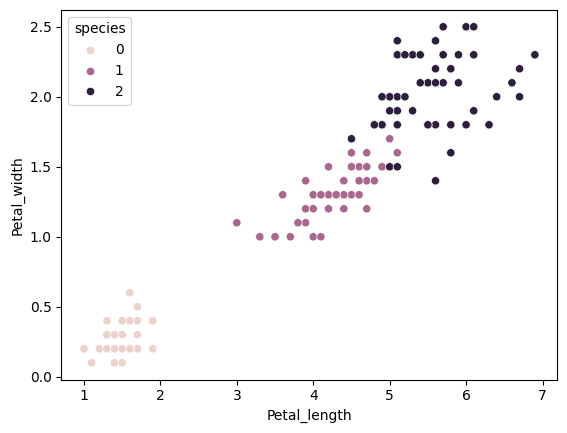

In [44]:
sns.scatterplot(iris_df,x='Petal_length',y='Petal_width',hue='species')

In [ ]:
# 3. AdaBoost Hyperparameter Tuning on the Titanic Dataset
# o Dataset: Use the Titanic Dataset from Kaggle or seaborn library.
# o Tasks:
# 1. Load the Titanic dataset, preprocess it (handle missing values and 
# encode categorical variables), and split it into training and testing sets 
# (80% train, 20% test).
# 2. Initialize an AdaBoost classifier with n_estimators=50 and a 
# Decision Tree base estimator (max_depth=1).
# 3. Perform hyperparameter tuning on n_estimators (values: 50, 100, 
# 150) and learning_rate (values: 0.1, 0.5, 1.0).
# 4. For each configuration, evaluate accuracy and F1-score on the test 
# data.
# 5. Plot accuracy and F1-score for each configuration and analyze how 
# tuning affects performance in terms of bias-variance trade-off.

In [87]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [88]:
titanic_df=sns.load_dataset('titanic')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [89]:
titanic_df.drop(columns=['alone','deck'],inplace=True)


In [90]:
titanic_df['age']=titanic_df['age'].fillna(value=titanic_df['age'].mean())
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(4), object(5)
memory usage: 85.2+ KB


In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [92]:
titanic_df.drop(inplace=True,columns=['survived','fare','who','adult_male','embark_town'])


In [93]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    889 non-null    int64   
 1   sex       889 non-null    object  
 2   age       889 non-null    float64 
 3   sibsp     889 non-null    int64   
 4   parch     889 non-null    int64   
 5   embarked  889 non-null    object  
 6   class     889 non-null    category
 7   alive     889 non-null    object  
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 56.6+ KB


In [111]:
X = titanic_df.drop('alive', axis=1) 
y = titanic_df['alive']  
label_encoder = LabelEncoder()
y =label_encoder.fit_transform(y)
y = y.astype(float)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ada_classifier= AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=100,                                     
    random_state=42                                    
)

In [112]:
y_train = y_train.astype(float)
ada_classifier.fit(X_train,y_train)


/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [113]:
y_d=ada_classifier.predict(X_test)
reports=classification_report(y_test,y_pred)
print(reports)

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       167
         1.0       0.75      0.72      0.73       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [115]:
# accuracy_depth_20
ada_classifier_50= AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=50,                                     
    random_state=42,
    learning_rate=0.1
)
ada_classifier_100= AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=100,                                     
    random_state=42,
    learning_rate=0.5
)
ada_classifier_150= AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=150,                                     
    random_state=42,
    learning_rate=1
)

In [116]:
ada_classifier_50.fit(X_train,y_train)
ada_classifier_100.fit(X_train,y_train)
ada_classifier_150.fit(X_train,y_train)


/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/om/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=150, random_state=42)

In [118]:
y_pred_50=ada_classifier_50.predict(X_test)
y_pred_100=ada_classifier_100.predict(X_test)
y_pred_150=ada_classifier_150.predict(X_test)


In [124]:
accuracy_score_50=accuracy_score(y_test,y_pred_50)
accuracy_score_100=accuracy_score(y_test,y_pred_100)
accuracy_score_150=accuracy_score(y_test,y_pred_150)
accuracy_df=pd.DataFrame({"accuracy_score":[accuracy_score_50,accuracy_score_100,accuracy_score_150],
                         "learning_rate":[0.1,0.5,1],
                         "n_estimators":[50,100,150]})

<Axes: xlabel='accuracy_score', ylabel='learning_rate'>

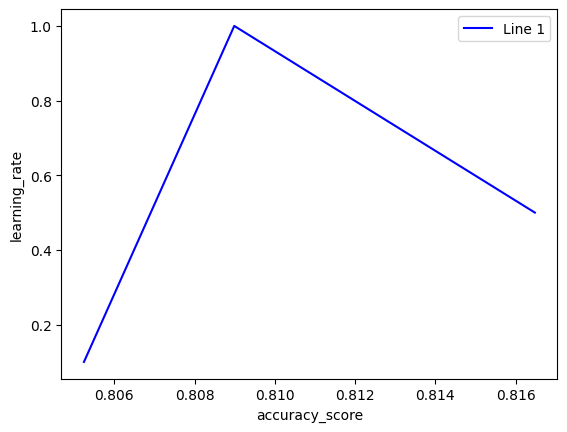

In [127]:
sns.lineplot(accuracy_df,x='accuracy_score', y='learning_rate', label="Line 1", color="blue")
# sns.lineplot(accuracy_df,x='accuracy_score', y='n_estimators', label="Line 2", color="orange")

<Axes: xlabel='accuracy_score', ylabel='n_estimators'>

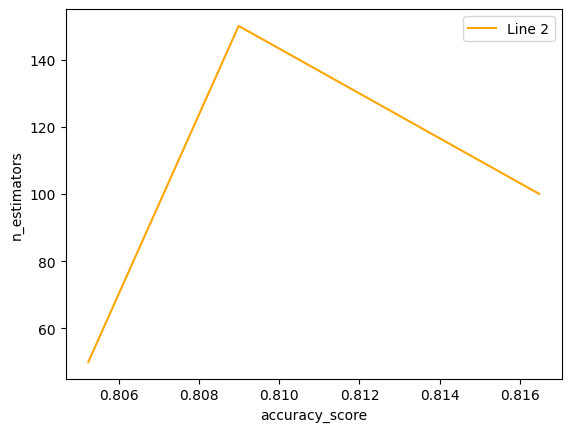

In [128]:
 sns.lineplot(accuracy_df,x='accuracy_score', y='n_estimators', label="Line 2", color="orange")